# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

Taylor Swift data info: https://github.com/rfordatascience/tidytuesday/blob/master/data/2023/2023-10-17/readme.md

In [99]:
# Uncomment the line below to install the tayloRswift color palette package.

# install.packages('tayloRswift')

In [10]:
library('tidyverse')
library('ggplot2')
library('lubridate')
library('tayloRswift')

In [2]:
taylor = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-10-17/taylor_album_songs.csv')

In [3]:
taylor |> 
    mutate(album_release = ymd(album_release)) |>
    head()

,album_name,ep,album_release,track_number,track_name,artist,featuring,bonus_track,promotional_release,single_release,⋯,liveness,valence,tempo,time_signature,duration_ms,explicit,key_name,mode_name,key_mode,lyrics
,<chr>,<lgl>,<date>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<int>,<int>,<lgl>,<chr>,<chr>,<chr>,<lgl>
1,Taylor Swift,FALSE,2006-10-24,1,Tim McGraw,Taylor Swift,NA,FALSE,NA,2006-06-19,⋯,0.1210,0.425,76.009,4,232107,FALSE,C,major,C major,NA
2,Taylor Swift,FALSE,2006-10-24,2,Picture To Burn,Taylor Swift,NA,FALSE,NA,2008-02-03,⋯,0.0962,0.821,105.586,4,173067,FALSE,G,major,G major,NA
3,Taylor Swift,FALSE,2006-10-24,3,Teardrops On My Guitar,Taylor Swift,NA,FALSE,NA,2007-02-19,⋯,0.1190,0.289,99.953,4,203040,FALSE,A#,major,A# major,NA
4,Taylor Swift,FALSE,2006-10-24,4,A Place In This World,Taylor Swift,NA,FALSE,NA,NA,⋯,0.3200,0.428,115.028,4,199200,FALSE,A,major,A major,NA
5,Taylor Swift,FALSE,2006-10-24,5,Cold As You,Taylor Swift,NA,FALSE,NA,NA,⋯,0.1230,0.261,175.558,4,239013,FALSE,F,major,F major,NA
6,Taylor Swift,FALSE,2006-10-24,6,The Outside,Taylor Swift,NA,FALSE,NA,NA,⋯,0.2400,0.591,112.982,4,207107,FALSE,F,major,F major,NA


In [4]:
tay_albums = taylor |>
    mutate(album_name = album_name |> fct_infreq() |> fct_rev())

tay_albums |> pull(album_name) |> levels()

[1] "reputation"                  "Taylor Swift"               
 [3] "1989"                        "folklore"                   
 [5] "evermore"                    "Speak Now"                  
 [7] "Lover"                       "Midnights"                  
 [9] "Fearless (Taylor's Version)" "Red (Taylor's Version)"

In [61]:
album_release_data = taylor |>
    mutate(album_release = ymd(album_release)) |>
    group_by(album_name, album_release) |>
    mutate(avg_energy = mean(energy, na.rm = TRUE)) |>
    distinct(album_name, .keep_all = TRUE) |>
    select(album_name, album_release, avg_energy) |>
    arrange(album_release)

album_release_data

album_name,album_release,avg_energy
<chr>,<date>,<dbl>
Taylor Swift,2006-10-24,0.6642667
Speak Now,2010-10-25,0.6670000
1989,2014-10-27,0.6970625
reputation,2017-11-10,0.5828667
Lover,2019-08-23,0.5452222
folklore,2020-07-24,0.4158235
evermore,2020-12-11,0.4940588
Fearless (Taylor's Version),2021-04-09,0.6391154
Red (Taylor's Version),2021-11-12,0.5869000


In [93]:
custom_order <- c('Red (Taylor\'s Version)','Fearless (Taylor\'s Version)','Midnights',
                  'Lover','Speak Now','evermore','folklore','1989','Taylor Swift',
                  'reputation')

album_release_data$album_name <- factor(album_release_data$album_name, levels = custom_order)
rearranged_album_release_data <- album_release_data[order(album_release_data$album_name), ]

rearranged_album_release_data

album_name,album_release,avg_energy
<fct>,<date>,<dbl>
Red (Taylor's Version),2021-11-12,0.5869000
Fearless (Taylor's Version),2021-04-09,0.6391154
Midnights,2022-10-21,0.4511500
Lover,2019-08-23,0.5452222
Speak Now,2010-10-25,0.6670000
evermore,2020-12-11,0.4940588
folklore,2020-07-24,0.4158235
1989,2014-10-27,0.6970625
Taylor Swift,2006-10-24,0.6642667


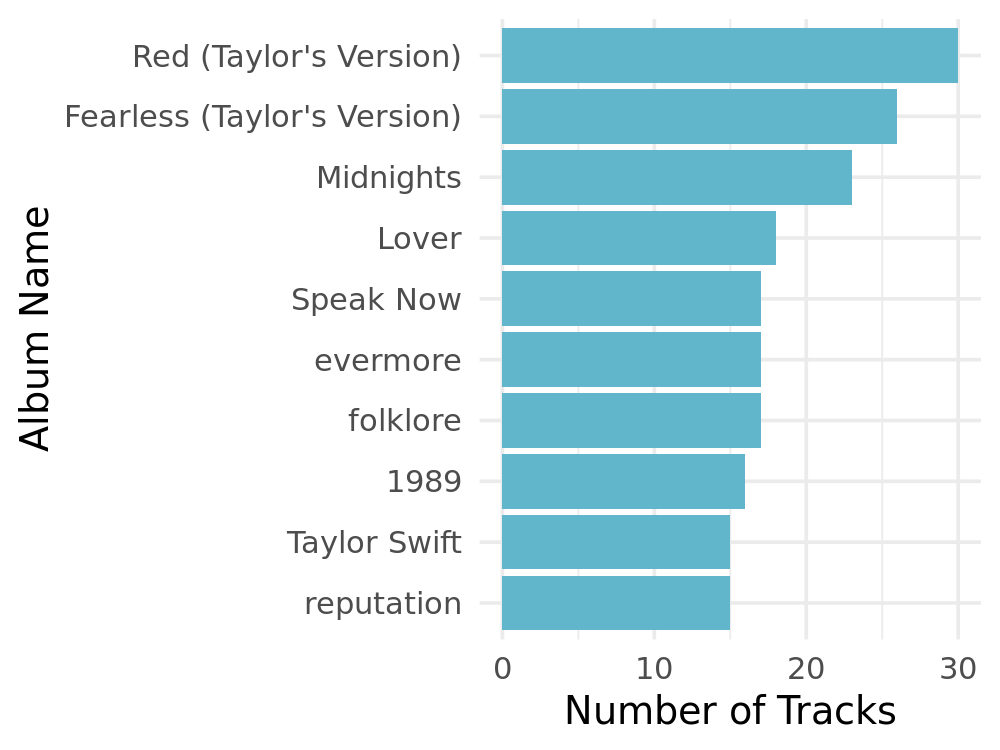

In [7]:
options(repr.plot.res = 250, repr.plot.height = 3, repr.plot.width = 4)

p = ggplot(tay_albums, aes(y = album_name)) +
    geom_bar(fill = c('#61b6cc')) +
    xlab('Number of Tracks') +
    ylab('Album Name') +
    theme_minimal()

p

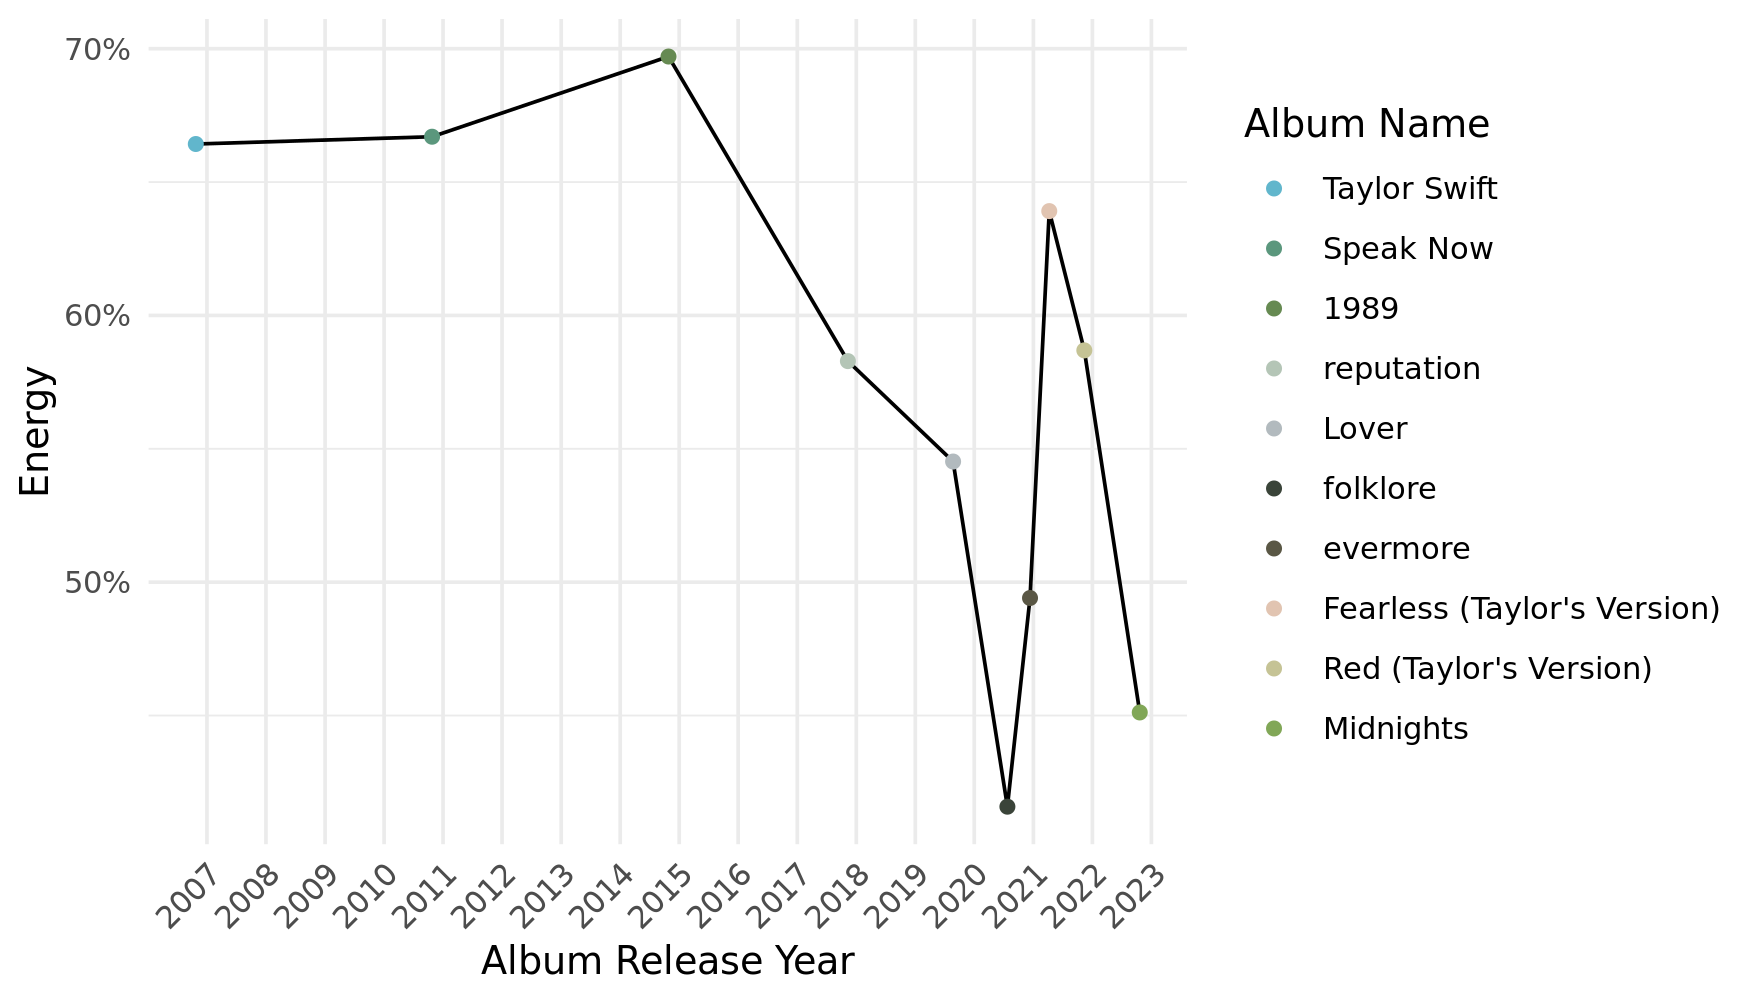

In [109]:
options(repr.plot.res = 250, repr.plot.height = 4, repr.plot.width = 7)

album_release_data$album_name <- factor(album_release_data$album_name,
                                        levels = c('Taylor Swift','Speak Now',
                                                    '1989','reputation',
                                                    'Lover','folklore','evermore',
                                                    'Fearless (Taylor\'s Version)',
                                                    'Red (Taylor\'s Version)','Midnights'))

p2 = ggplot(album_release_data, aes(y = avg_energy, x = album_release)) +
    geom_line(na.rm = TRUE) +
    geom_point(aes(color = album_name)) +
    scale_x_date(date_breaks = '1 year', date_minor_breaks = '1 year', date_labels = '%Y') +
    scale_y_continuous(labels = scales::percent_format(scale = 100)) +
    xlab('Album Release Year') +
    ylab('Energy') +
    guides(color = guide_legend('Album Name')) +
    theme_minimal() +
    scale_color_taylor(palette = 'taylorSwift') +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

p2

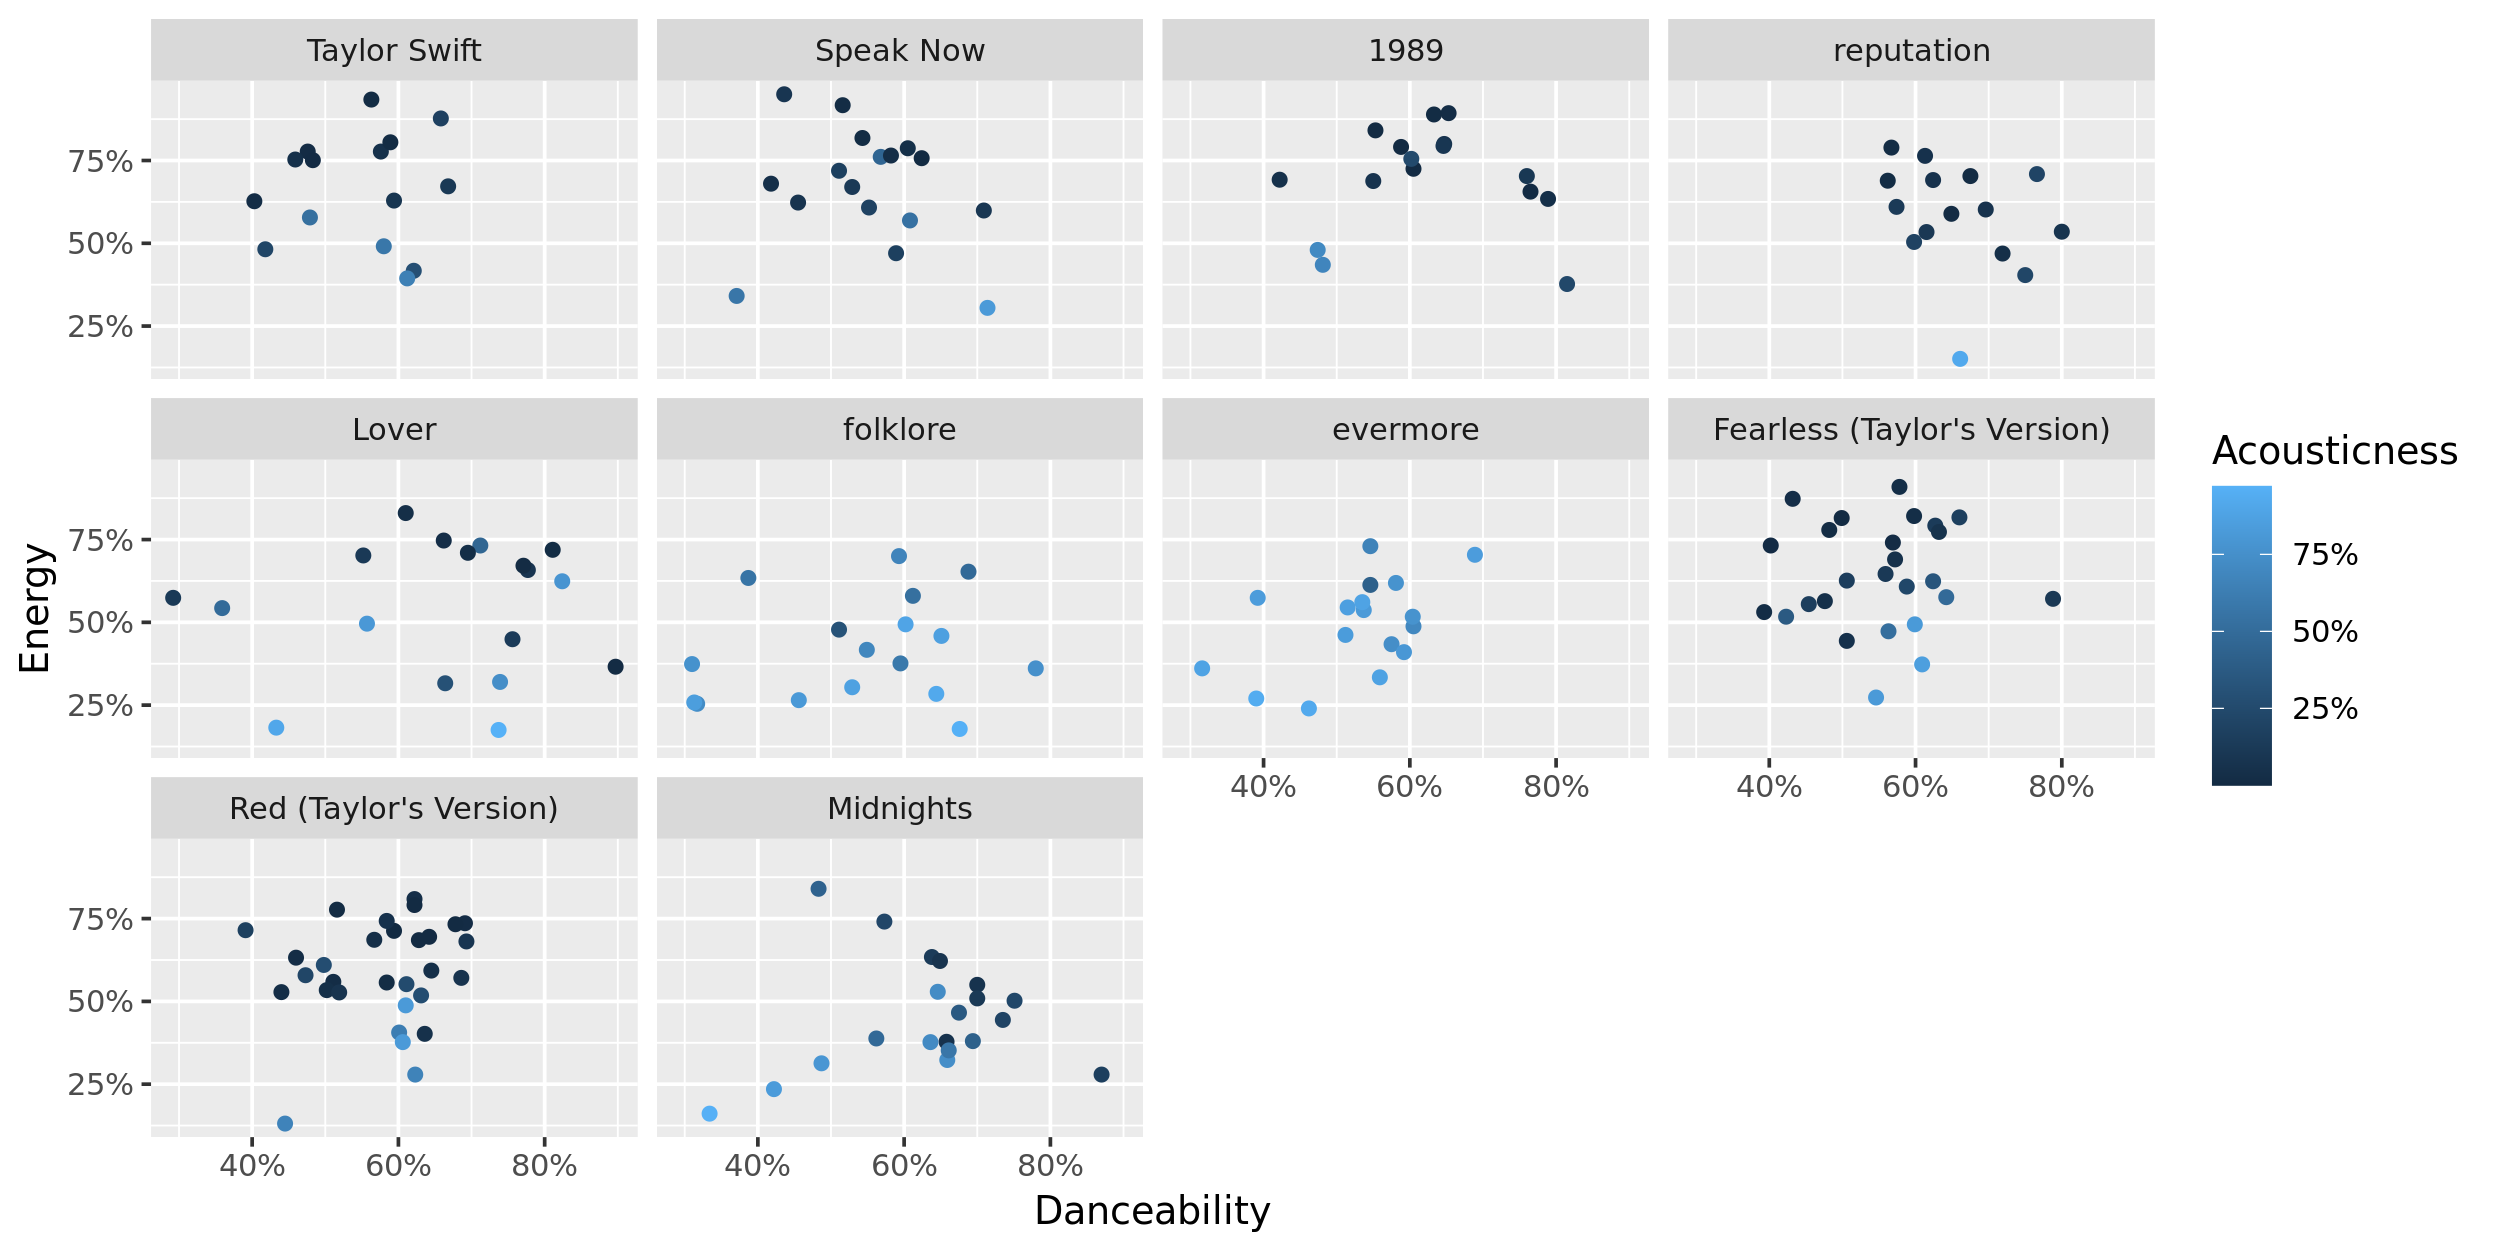

In [111]:
options(repr.plot.res = 250, repr.plot.height = 5, repr.plot.width = 10)

taylor$album_name <- factor(taylor$album_name, levels = c('Taylor Swift','Speak Now',
                                                          '1989','reputation','Lover',
                                                          'folklore','evermore',
                                                          'Fearless (Taylor\'s Version)',
                                                          'Red (Taylor\'s Version)','Midnights'))

p3 = ggplot(taylor, aes(y = energy, x = danceability, color = acousticness)) +
    geom_point(na.rm = TRUE) +
    facet_wrap(~album_name) +
    scale_x_continuous(labels = scales::percent_format(scale = 100)) +
    scale_y_continuous(labels = scales::percent_format(scale = 100)) +
    scale_color_continuous(name = 'Acousticness',
                           labels = scales::percent_format(scale = 100)) +
    xlab('Danceability') +
    ylab('Energy')

p3

## Analysis Walk-Through
The bar chart (p1) above displays the number of tracks on each of Taylor Swift's albums. Red (Taylor's Version) and Fearless (Taylor's Version), which are the only re-recordings in this dataset, appear to be the artist's albums with the most number of tracks. 